In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import numpy as np
from matplotlib import pyplot as plt
import igraph

import pythd

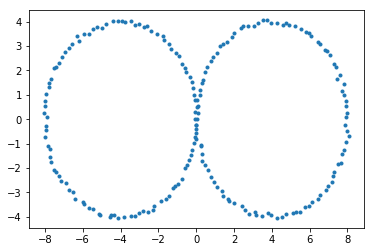

In [28]:
# Create and show two circles with some noise
dataset = (pythd.datagen.DatasetGenerator()
                .circle(center=[-4.0, 0.0], radius=4.0, noise=0.06, num_points=100)
                .circle(center=[4.0, 0.0], radius=4.0, noise=0.06, num_points=100)).get()
plt.plot(dataset[:, 0], dataset[:, 1], ".")
plt.show()

In [56]:
# Setup MAPPER
filt = pythd.filter.ComponentFilter(0) # filter: x component
f_x = filt(dataset)
cover = pythd.cover.IntervalCover1D.EvenlySpacedFromValues(f_x, 7, 0.52)
clustering = pythd.clustering.HierarchicalClustering()

In [57]:
# Run MAPPER
mapper = pythd.mapper.MAPPER(filter=filt, cover=cover, clustering=clustering)
res = mapper.run(dataset)

In [58]:
# Create igraph graph
g = res.get_igraph_network()
print(g)

IGRAPH UN-- 10 17 --
+ attr: name (v), points (v)
+ edges (vertex names):
0 -- 1, 2, 3, 4, 6   3 -- 0, 1, 6         6 -- 0, 3, 4, 5      9 -- 1, 2, 7
1 -- 0, 2, 3, 4, 9   4 -- 0, 1, 6         7 -- 2, 8, 9
2 -- 0, 1, 7, 8, 9   5 -- 6               8 -- 2, 7


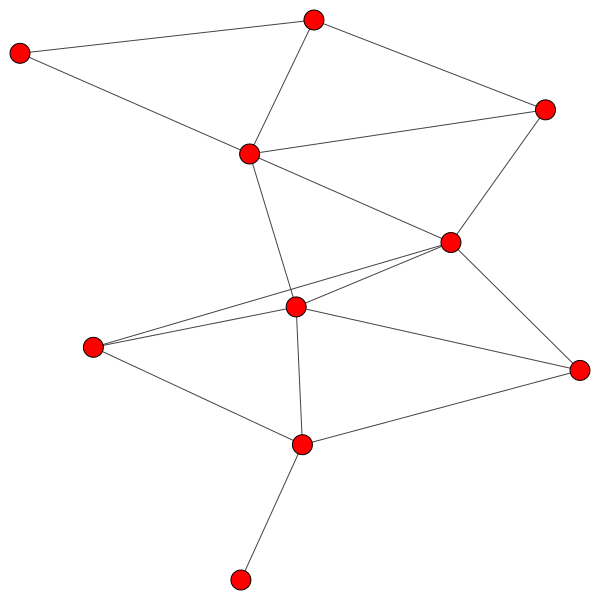

In [59]:
# Visualize the graph
layout = g.layout_kamada_kawai()
igraph.plot(g, layout=layout)

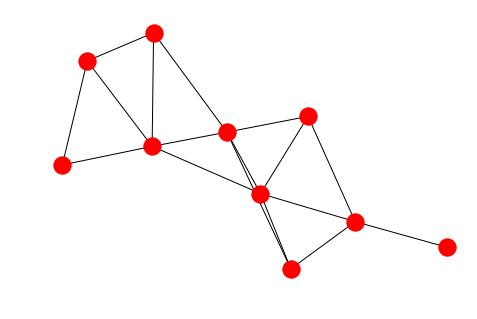

In [60]:
# Visualize with networkx
import networkx as nx
g = res.get_networkx_network()
nx.draw(g)

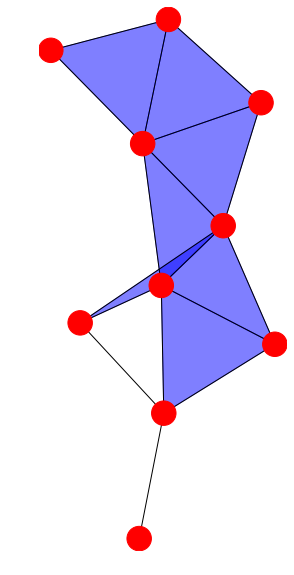

In [61]:
from importlib import reload
import pythd.plotting as plot
reload(plot)
plot.draw_2_skeleton(res.compute_k_skeleton(k=2), layout)

In [ ]:
x = np.zeros((0,2))
print(x)